In [4]:
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from make_dataset_01 import *

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 10s 96ms/step - loss: 0.6497 - acc: 0.6315 - val_loss: 0.5394 - val_acc: 0.7680
Epoch 2/100
100/100 [==============================] - 9s 94ms/step - loss: 0.5462 - acc: 0.7650 - val_loss: 0.4490 - val_acc: 0.8310
Epoch 3/100
100/100 [==============================] - 9s 94ms/step - loss: 0.5006 - acc: 0.7800 - val_loss: 0.4053 - val_acc: 0.8330
Epoch 4/100
100/100 [==============================] - 9s 94ms/step - loss: 0.4646 - acc: 0.8040 - val_loss: 0.3667 - val_acc: 0.8620
Epoch 5/100
100/100 [==============================] - 9s 94ms/step - loss: 0.4405 - acc: 0.8145 - val_loss: 0.3500 - val_acc: 0.8650
Epoch 6/100
100/100 [==============================] - 9s 94ms/step - loss: 0.4146 - acc: 0.8190 - val_loss: 0.3304 - val_acc: 0.8740
Epoch 7/100
100/100 [==============================] - 9s 94ms/step - loss: 0.4106 - acc: 0.8145 - val_loss: 0.

100/100 [==============================] - 9s 94ms/step - loss: 0.2721 - acc: 0.8855 - val_loss: 0.2376 - val_acc: 0.9010
Epoch 62/100
100/100 [==============================] - 9s 94ms/step - loss: 0.2617 - acc: 0.8895 - val_loss: 0.2389 - val_acc: 0.9030
Epoch 63/100
100/100 [==============================] - 9s 94ms/step - loss: 0.2799 - acc: 0.8755 - val_loss: 0.2363 - val_acc: 0.9050
Epoch 64/100
100/100 [==============================] - 9s 94ms/step - loss: 0.2724 - acc: 0.8835 - val_loss: 0.2356 - val_acc: 0.9060
Epoch 65/100
100/100 [==============================] - 9s 94ms/step - loss: 0.2811 - acc: 0.8765 - val_loss: 0.2401 - val_acc: 0.9030
Epoch 66/100
100/100 [==============================] - 9s 94ms/step - loss: 0.2860 - acc: 0.8820 - val_loss: 0.2365 - val_acc: 0.9020
Epoch 67/100
100/100 [==============================] - 9s 94ms/step - loss: 0.2659 - acc: 0.8820 - val_loss: 0.2448 - val_acc: 0.9010
Epoch 68/100
100/100 [==============================] - 9s 94ms/step

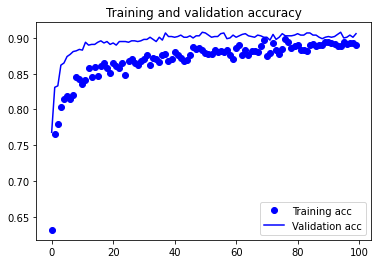

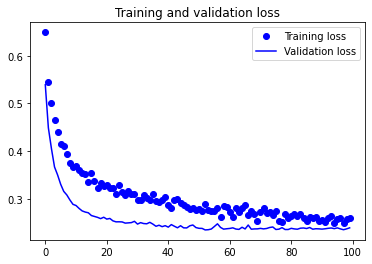

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()